In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('Train_Titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# The dataset contains 891 rows
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
# The describe method shows some interesting data...
# Someone paid 512 for their fare? Seems like an outlier
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Checking missing data
# The ages of 177 passengers are unknown 
# The embarked feature is missing for two passengers
titanic_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

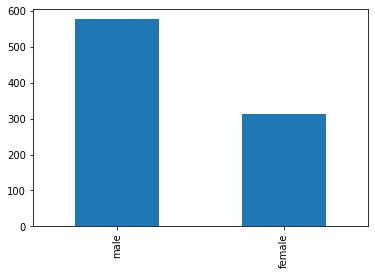

In [8]:
# A lot more male than females in the dataset
titanic_data['Sex'].value_counts().plot(kind='bar')

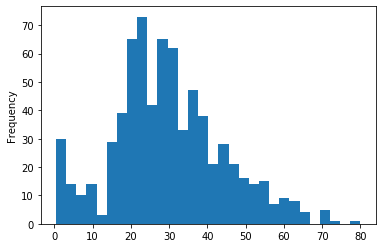

In [9]:
# A lot of the passengers were ages between 20 and 35
titanic_data['Age'].plot(kind='hist', bins=30)

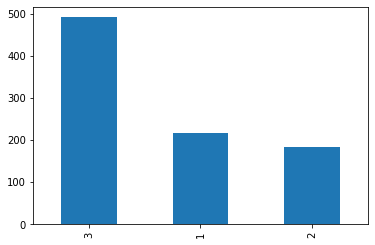

In [10]:
# A lot of the passengers were of class 3
titanic_data['Pclass'].value_counts().plot(kind='bar')

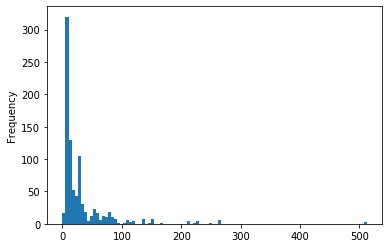

In [11]:
# A lot of the passengers paid between 1 and 50 for the fare
titanic_data['Fare'].plot(kind='hist', bins=100)

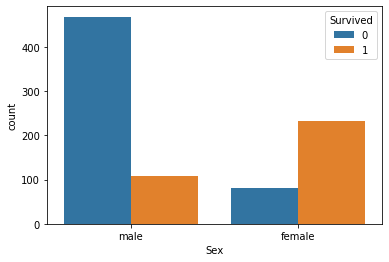

In [12]:
# Let's go deeper using seaborn
# Interesting... a lot more females survived more than males
# Also, a lot more males died compared to females

sns.countplot(x=titanic_data['Sex'], hue=titanic_data['Survived'])

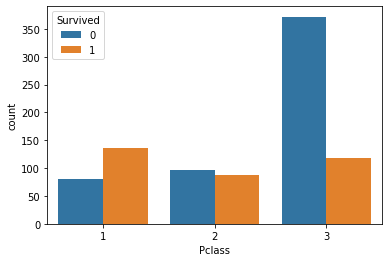

In [13]:
# Class 1 passengers had more surival chance rate compared to other classes
sns.countplot(titanic_data['Pclass'], hue=titanic_data['Survived'])

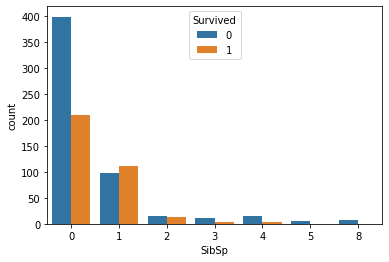

In [14]:
# Interesting... your chance of surivial also depends on the number of siblings you have on the boat
# However, this could be affected by other factors such as the passenger class
sns.countplot(titanic_data['SibSp'], hue=titanic_data['Survived'])

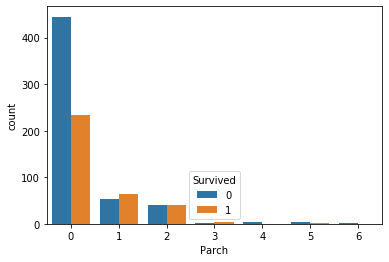

In [15]:
# Same thing as above
sns.countplot(titanic_data['Parch'], hue=titanic_data['Survived'])

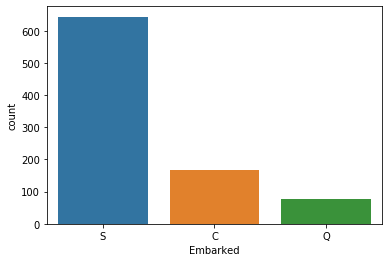

In [16]:
# A lot of the passengers boarded the titanic from South Hampton
sns.countplot(titanic_data['Embarked'])

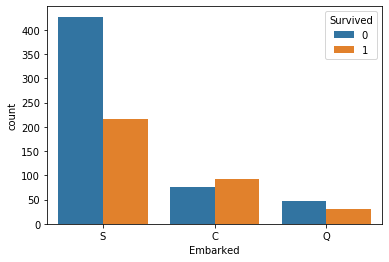

In [17]:
# Most of the passengers who survived were the ones who boarded from Southhampton
sns.countplot(titanic_data['Embarked'], hue=titanic_data['Survived'])

### Deal with missing data

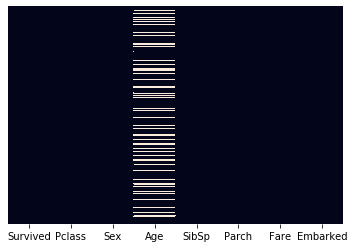

In [18]:
# Check for missing data using heatmap

# A lot of data missing the Age feature
# The data already contains two missing Embarked feature
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [19]:
# Drop the two rows with missing Embarked feature
print(titanic_data.shape)
titanic_data.dropna(subset=['Embarked'], inplace=True)
print(titanic_data.shape)

(891, 8)
(889, 8)


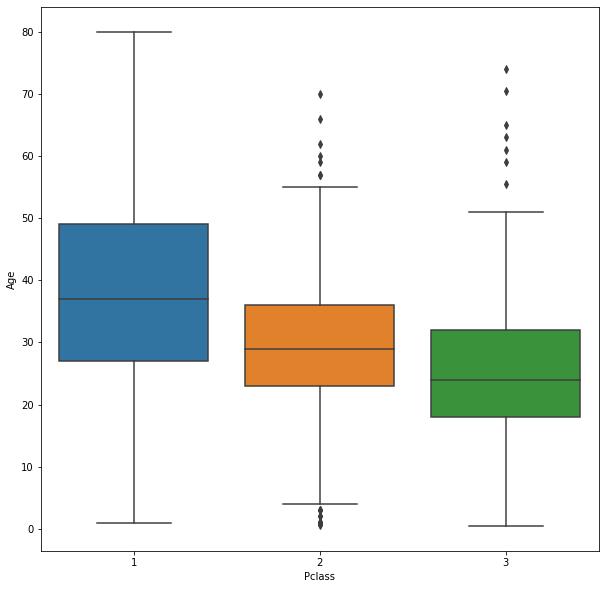

In [20]:
# Let's find the average age of the different passengers in each class
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

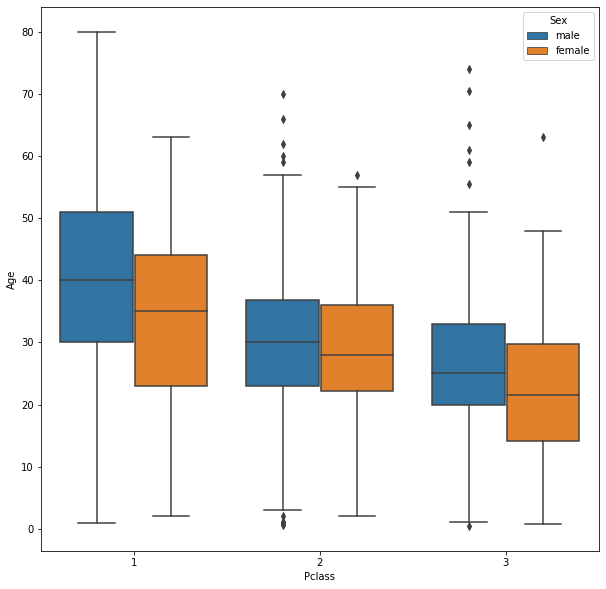

In [21]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Age', data=titanic_data, hue='Sex')

In [22]:
# Create a function to impute missing age based on sex and pclass
def impute_missing_age(column):
    sex = column[0]
    age = column[1]
    pclass = column[2]
    if pd.isna(age):
        if sex == 'female' and pclass == 1:
            return 35
        elif sex == 'male' and pclass == 1:
            return 40
        elif sex == 'female' and pclass == 2:
            return 28
        elif sex == 'male' and pclass == 2:
            return 30
        elif sex == 'female' and pclass == 3:
            return 21
        elif sex == 'male' and pclass == 3:
            return 25
    else:
        return age

In [23]:
# Impute the missing age now
titanic_data['Age'] = titanic_data[['Sex', 'Age', 'Pclass']].apply(impute_missing_age, axis=1)

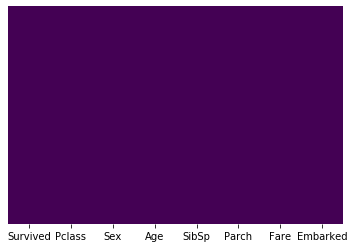

In [24]:
# No missing data now
sns.heatmap(titanic_data.isna(), yticklabels=False, cbar=False, cmap='viridis')

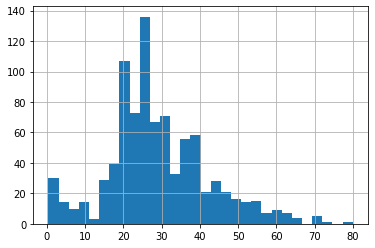

In [25]:
# Check the age distribution of the dataset
titanic_data['Age'].hist(bins=30)

### Encode the categorical variables

In [26]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Pclass', 'Sex', 'Embarked']
encoder = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', encoder, categorical_features)], remainder='passthrough')

In [28]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']

In [29]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,21.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=101)

In [32]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [33]:
X_train

array([[  1.    ,   0.    ,   0.    , ...,   1.    ,   0.    , 108.9   ],
       [  0.    ,   0.    ,   1.    , ...,   3.    ,   1.    ,  25.4667],
       [  0.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,   7.7875],
       ...,
       [  0.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,   8.05  ],
       [  0.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,   7.2292],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,  13.    ]])

In [34]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_preds = classifier.predict(X_test)

### Model evaluation

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



In [38]:
print(confusion_matrix(y_test, y_preds))

[[98  9]
 [24 47]]


In [39]:
print(accuracy_score(y_test, y_preds))

0.8146067415730337
